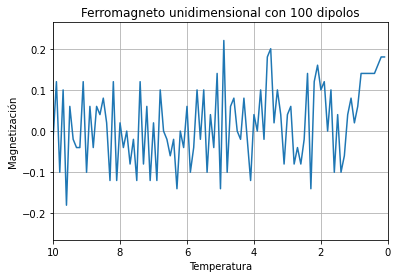

In [44]:
# modelo de Ising unidimensional

import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Genera la matriz de interacción para los espines
def generar_interaccion_espines(n: int) -> np.ndarray:
    matriz_interaccion = np.zeros((n, n))
    np.fill_diagonal(matriz_interaccion[1:], 1)
    np.fill_diagonal(matriz_interaccion[:, 1:], 1)
    return matriz_interaccion

# Inicializa el vector de espines
def inicializar_espines(n: int, num_espines: int = 50) -> np.ndarray:
    espines = np.ones(n)
    indices = np.random.choice(n, num_espines, replace=False)
    espines[indices] = -1
    return espines

# Simula el modelo de Ising
def modelo_Ising(n: int, temperatura_inicial: float) -> (np.ndarray, np.ndarray): # type: ignore
    espines = inicializar_espines(n)
    matriz_interaccion = generar_interaccion_espines(n)
    energia_inicial = -0.5 * espines @ matriz_interaccion @ espines.T

    promedio_espines = []
    temperaturas = []
    indices = np.arange(len(espines))
    decremento_temperatura = 0.1
    num_pasos = int(temperatura_inicial / decremento_temperatura)

    for paso in range(num_pasos):
        temperaturas.append(temperatura_inicial)
        promedio_espines.append(np.mean(espines))
        for i in indices:
            espin_actual = espines[i]
            espines[i] = -espin_actual
            energia_nueva = -0.5 * espines @ matriz_interaccion @ espines.T
            if energia_nueva - energia_inicial <= 0:
                energia_inicial = energia_nueva
            else:
                probabilidad = math.exp(-(energia_nueva - energia_inicial) / temperatura_inicial)
                if random.random() > probabilidad:
                    espines[i] = espin_actual
                else:
                    energia_inicial = energia_nueva
        temperatura_inicial -= decremento_temperatura

    return np.array(promedio_espines), np.array(temperaturas)

# Ejecuta la simulación
promedio_espines, temperaturas = modelo_Ising(100, 30.0)

# Genera la gráfica de resultados
figura, eje = plt.subplots()
eje.set_title('Ferromagneto unidimensional con 100 dipolos')
eje.set_ylabel('Magnetización')
eje.set_xlabel('Temperatura')
eje.set_xlim(10, 0)
eje.errorbar(x=temperaturas, y=promedio_espines)
plt.grid()
plt.show()


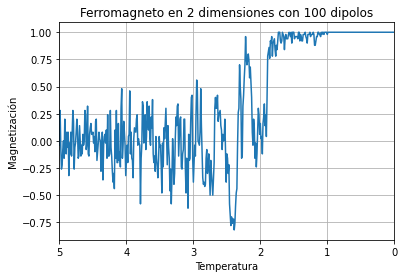

In [50]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Genera la matriz de interacción para el modelo de Ising en 2D
def generar_interaccion_ising(n: int) -> np.ndarray:
    matriz_interaccion = np.zeros((n * n, n * n))
    for i in range(n):
        for j in range(n):
            idx = i * n + j
            if i > 0: matriz_interaccion[idx, (i - 1) * n + j] = 1  # Interacción con el espín de arriba
            if i < n - 1: matriz_interaccion[idx, (i + 1) * n + j] = 1  # Interacción con el espín de abajo
            if j > 0: matriz_interaccion[idx, i * n + (j - 1)] = 1  # Interacción con el espín de la izquierda
            if j < n - 1: matriz_interaccion[idx, i * n + (j + 1)] = 1  # Interacción con el espín de la derecha
    return matriz_interaccion

# Inicializa los espines de forma aleatoria con algunos apuntando hacia arriba (-1)
def inicializar_espines(n: int, num_espines: int = 50) -> np.ndarray:
    espines = np.zeros(n * n)
    indices = np.arange(len(espines))
    np.random.shuffle(indices)
    indices_no_activados = indices[num_espines:]
    espines[indices_no_activados] = 1
    return np.where(espines == 0, -1, 1)

# Simula el modelo de Ising
def modelo_ising(n: int, temperatura_inicial: float, decremento_temperatura: float = 0.01) -> (np.ndarray, np.ndarray):
    espines = inicializar_espines(n)
    matriz_interaccion = generar_interaccion_ising(n)
    energia_inicial = -0.5 * espines @ matriz_interaccion @ espines.T

    promedio_espines = []  # Lista para almacenar el promedio de los espines en cada paso
    temperaturas = []  # Lista para almacenar la temperatura en cada paso
    num_pasos = int(temperatura_inicial / decremento_temperatura)

    # Bucle principal de la simulación
    for _ in range(num_pasos):
        temperaturas.append(temperatura_inicial)
        promedio_espines.append(np.mean(espines))
        for i in range(len(espines)):
            espin_actual = espines[i]
            espines[i] = -espin_actual  # Cambia el espín
            nueva_energia = -0.5 * espines @ matriz_interaccion @ espines.T
            if nueva_energia - energia_inicial <= 0:
                energia_inicial = nueva_energia
            else:
                probabilidad = math.exp(-(nueva_energia - energia_inicial) / temperatura_inicial)
                if random.random() > probabilidad:
                    espines[i] = espin_actual  # Revertir el cambio si no se acepta
                else:
                    energia_inicial = nueva_energia
        temperatura_inicial -= decremento_temperatura  # Reducir la temperatura

    return np.array(promedio_espines), np.array(temperaturas)

# Ejecuta la simulación
promedio_espines, temperaturas = modelo_ising(10, 30)

# Genera la gráfica de resultados
figura, eje = plt.subplots()
eje.set_title('Ferromagneto en 2 dimensiones con 100 dipolos')
eje.set_ylabel('Magnetización')
eje.set_xlabel('Temperatura')
eje.set_xlim(5, 0)
eje.errorbar(x=temperaturas, y=promedio_espines)
plt.grid()
plt.show()